In [7]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import module up a directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from rooflineModel import Roofline, select, generator, getUniqueCols, columnFormat

In [8]:
# JS: Since our code is not multi-threaded we say just one core.
# and we are taking the 16 FPs per cycle from AMD EPYC 7543 32-Core processor
baseGHz = 2.1 # This is in our config file...
cores = 1
floatPerCycle = 16
# baseFP = floatPerCycle * baseGHz * cores * 1E9
baseFP = 19.5 * 1e12
#pi:  the inside of the tuple would be the roofline of computation, (base fp, 0, base fp) -> (label, m, b) m,b from y = mx + b 
pi = [("Base FP", 0, baseFP), ("Base FP16Tensor", 0, 312 * 1e12)]
print(pi)

# linkBandwidthGBperSec = 2.5 
# linkBandwidth = linkBandwidthGBperSec / (1024*1024*1024)

memory_bandwidth_TB = 1.55  # Given in TB/s
# memory_bandwidth_GB = memory_bandwidth_TB * 1e12  # Convert TB/s to GB/
memory_bandwidth_GB = 1935 * 1e9 # Convert TB/s to GB/


#betas is a slope, by the linkBandwidth, line must go through the origin, you can do multiple bandwidth lines by adding more tuples to betas.
betas = [("Memory BW", memory_bandwidth_GB, 0)]
print(betas)

[('Base FP', 0, 19500000000000.0), ('Base FP16Tensor', 0, 312000000000000.0)]
[('Memory BW', 1935000000000.0, 0)]


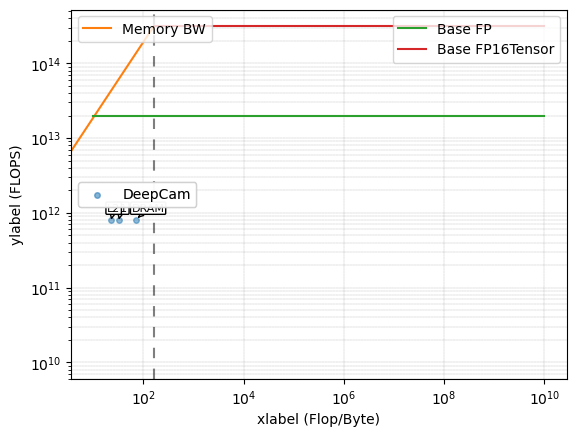

In [9]:
# JS: Network roofline
rf = Roofline(pi, betas, "xlabel (Flop/Byte)", "ylabel (FLOPS)", xlim=(1E10, 1E10), ylim=(1E10, 1E12))
# Get all your x coordinates together and then y coordinates together like matplotlib ie plot(x, y, label=label)
# Dictionary format {"LEGEND NAME": ([list of x coordinates], [list of y coordinates])}
# rf.addData({"SOME DATA":([1E20, 2E30], [2E10, 2E10])})
# # Dictionary format {"LEGEND NAME": { "annotate name":(x,y), "annotate name2":(x,y),}
# rf.addLabelData({"SOME DATA2":{"Blah": (3E20, 1E9), "Blah2":(4E25, 1E9)}})
# rf.plot()

# L1  OI: 32.50938135698264
# L2  OI: 22.834387308960533
# DRAM OI: 70.5625116152552
# Performance (FLOP/s): 804224191235.205
rf.addLabelData({"DeepCam": {"DRAM": (70.5625116152552, 804224191235.205),"L1": (32.50938135698264, 804224191235.205),"L2": (22.834387308960533,804224191235.205)}})

# Plot the Roofline model
rf.plot()